# Predicting Car Prices

In this project, we'll be leveraging a machine learning workflow to predict a car's market price using its attributes.

The data set we'll be working with contains information on various cars.  For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.  Further documentation on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile), and the data can be downloaded directly [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

## Introduction to the Data Set

As for the data set's columns:

- `symboling` corresponds to the insurance risk level of a car.  Cars are initially assigned a risk factor symbol associated with their price.  Then, if a car is considered "riskier", the symbol is adjusted up along the scale.  A value of +3 indicates that a car is very risky, while a value of -3 indicates that it is likely quite safe.
- `normalized_losses` refers to the relative average loss payment per insured vehicle year. This value is normalized for all vehicles within a particular size classification (i.e. two-door, small, station wagon, sports/specialty, etc) and represents the average loss per car per year.  The values range from 65 to 256, in our case.

The remainder of the features/attributes are pretty straightforward/self-explanatory.

In [1]:
import pandas as pd

columns = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
cars = pd.read_csv("imports-85.data", header = None, names = columns)
pd.options.display.max_columns = None
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cars.shape

(205, 26)

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

Taking a look at our data set, there are several columns which are both numeric and continuous and can be used as features for our algorithm: `normalized_losses`, `wheel_base`, `length`, `width`, `height`, `curb_weight`, `bore`, `stroke`, `compression_ratio`, `horsepower`, `peak_rpm`, `city_mpg`, and `highway_mpg`.

We'll separate these out and work with only them, going forward.

In [4]:
numeric_cols = ["normalized_losses", "wheel_base", "length", "width", "height", "curb_weight", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
cars_numeric = cars[numeric_cols].copy()
cars_numeric.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

We can see, in our data preview above, that the `normalized_losses` column contains some missing values in the form of `?` marks (other columns may also contain these, as suggested by some of our numeric columns being of the "object" \[string] datatype).  We're going to replace these with actual null values, convert all of the columsn we're using to numeric datatypes, and fill in missing values with column means.

In [5]:
import numpy as np

cars_numeric = cars_numeric.replace("?", np.nan) # replace all ? marks in the data with null values

cars_numeric.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


Now we'll make sure all of our numeric columns actually contain numeric datatypes.

In [6]:
cars_numeric = cars_numeric.astype(float)

In [7]:
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


Since `price` is the value we want to predict, we'll remove any rows with missing price values.

In [8]:
cars_numeric = cars_numeric.dropna(subset=["price"])
cars_numeric.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

Now we'll fill in the remaining missing values using the column means.

In [9]:
cars_numeric = cars_numeric.fillna(cars_numeric.mean())
cars_numeric.isnull().sum() # check if any null values are left

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Finally, we'll normalize/rescale all of the values in our numeric columns so they all range between 0 and 1 (making sure to exclude `price`).

In [10]:
price_col = cars_numeric["price"]
cars_numeric = (cars_numeric - cars_numeric.min()) / (cars_numeric.max() - cars_numeric.min())
cars_numeric["price"] = price_col

In [11]:
cars_numeric.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

Let's start with some univariate k-nearest neighbors models.  We'll go one column at a time, testing k values of 1, 3, 5, 7, and 9 for each.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    np.random.seed(1) # random seed for reproducibility
    
    # randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    
    # split dataframe in half - half training data, half test data
    midpoint = int(len(df_shuffled) / 2) # round to nearest integer
    train_data = df_shuffled.iloc[:midpoint]
    test_data = df_shuffled.iloc[midpoint:]
    
    # instantiate KNeighborsRegressor object
    knn = KNeighborsRegressor()

    # fit KNN model using default k-value
    knn.fit(train_data[[train_col]], train_data[target_col])\

    # make predictions using the model
    predictions = knn.predict(test_data[[train_col]])

    # calculate and return RMSE
    return mean_squared_error(test_data[target_col], predictions) ** (1/2)

feature_cols = cars_numeric.columns.tolist()
feature_cols.remove("price")

rmses = {}

# for each column, train a model and add the resulting RMSE value to the "rmses" dictionary
for col in feature_cols:
    rmses[col] = knn_train_test(col, "price", cars_numeric)

# create and sort a series for the collected RMSE values for easier/clearer viewing of results
rmses_series = pd.Series(rmses)
rmses_series.sort_values()

horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [13]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1) # random seed for reproducibility
    
    # randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    
    # split dataframe in half - half training data, half test data
    midpoint = int(len(df_shuffled) / 2) # round to nearest integer
    train_data = df_shuffled.iloc[:midpoint]
    test_data = df_shuffled.iloc[midpoint:]
    
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    for k in k_values:
        # instantiate KNeighborsRegressor object
        knn = KNeighborsRegressor(k)

        # fit KNN model using default k-value
        knn.fit(train_data[[train_col]], train_data[target_col])\

        # make predictions using the model
        predictions = knn.predict(test_data[[train_col]])

        # calculate and add RMSE to dictionary
        k_rmses[k] = mean_squared_error(test_data[target_col], predictions) ** (1/2)
    
    return k_rmses

feature_cols = cars_numeric.columns.tolist()
feature_cols.remove("price")

k_rmse_results = {}

for col in feature_cols:
    k_rmse_results[col] = knn_train_test(col, "price", cars_numeric)

k_rmse_results

{'normalized_losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel_base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

In [14]:
rmse_data = pd.DataFrame(k_rmse_results)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

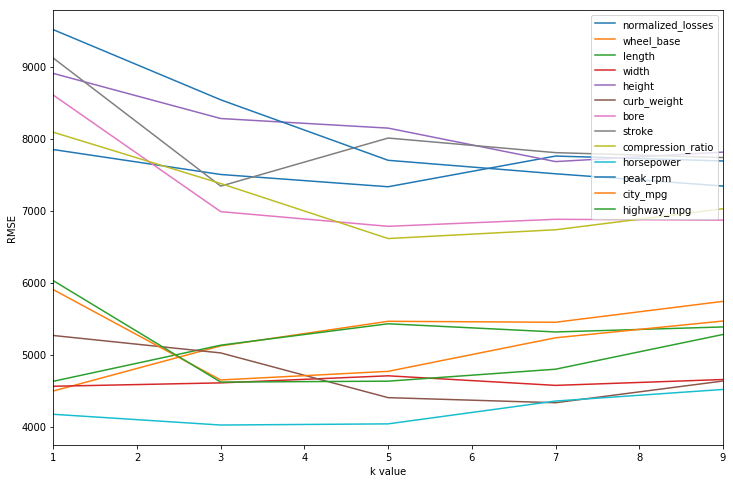

In [16]:
rmse_data.plot(figsize=(12, 8))
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()

## Multivariate Model

Now let's modify the function we created to work with multiple columns, using the default (5) k value for the KNN model.

In [17]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1) # random seed for reproducibility
    
    # randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    
    # split dataframe in half - half training data, half test data
    midpoint = int(len(df_shuffled) / 2) # round to nearest integer
    train_data = df_shuffled.iloc[:midpoint]
    test_data = df_shuffled.iloc[midpoint:]
    
    # instantiate KNeighborsRegressor object
    knn = KNeighborsRegressor()

    # fit KNN model using default k-value
    knn.fit(train_data[train_cols], train_data[target_col])\

    # make predictions using the model
    predictions = knn.predict(test_data[train_cols])

    # calculate and return RMSE
    return mean_squared_error(test_data[target_col], predictions) ** (1/2)

Now we'll test this updated function using the 2, 3, 4, and 5 best features from above.

In [18]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_ratio    7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64

In [19]:
multi_rmses = {}

best_features = ["horsepower", "width", "curb_weight", "highway_mpg", "length"]

# for each column, train a model and add the resulting RMSE value to the "rmses" dictionary
for i in range(2, len(best_features) + 1):
    multi_rmses["{} Best Features".format(i)] = knn_train_test(best_features[0:i], "price", cars_numeric)

# again, create and sort a series for the collected RMSE values for easier/clearer viewing of results
multi_rmses

{'2 Best Features': 3589.3132622073304,
 '3 Best Features': 3305.9401397969677,
 '4 Best Features': 3358.6915801682458,
 '5 Best Features': 3665.546673045813}

## Hyperparameter Tuning

Now, for the top 3 models above (2 best, 3 best, and 4 best features), we'll vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.  Let's adjust our function accordingly:

In [20]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1) # random seed for reproducibility
    
    # randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    
    # split dataframe in half - half training data, half test data
    midpoint = int(len(df_shuffled) / 2) # round to nearest integer
    train_data = df_shuffled.iloc[:midpoint]
    test_data = df_shuffled.iloc[midpoint:]
    
    rmse_values = {}
    
    for i in range(1, 26):
        
        # instantiate KNeighborsRegressor object
        knn = KNeighborsRegressor(i)

        # fit KNN model using default k-value
        knn.fit(train_data[train_cols], train_data[target_col])\

        # make predictions using the model
        predictions = knn.predict(test_data[train_cols])

        # calculate and add RMSE to dictionary above
        rmse_values[i] = mean_squared_error(test_data[target_col], predictions) ** (1/2)
        
    return rmse_values

multi_k_rmses = {}

for i in range(2, 5):
    multi_k_rmses["{} Best Features".format(i)] = knn_train_test(best_features[:i], "price", cars_numeric)

multi_k_rmses

{'2 Best Features': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787,
  25: 4921.936353813013},
 '3 Best Features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702

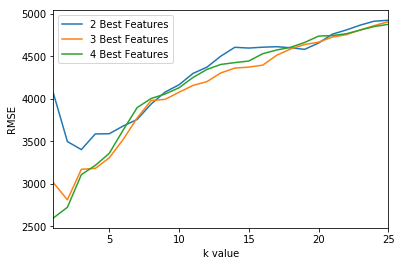

In [23]:
pd.DataFrame(multi_k_rmses).plot.line()
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()